In [244]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [60]:
data = []
labels = []
classes = 43
os.getcwd()

'/Users/harshithareddy/Documents/Harshitha/DSP/Project/Trafficsigns'

In [96]:
os.getcwd()

'/Users/harshithareddy/Documents/Harshitha/DSP/Project/Trafficsigns'

In [61]:
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'archive','Train',str(i))
    images = os.listdir(path)
    
    for im in images:
        try:
            image = Image.open(path + '/' + im)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [62]:
data = np.array(data)
labels = np.array(labels)

In [64]:
data.shape

(39209, 30, 30, 3)

In [63]:
data[0].shape

(30, 30, 3)

In [66]:
image[0].shape


(30, 3)

In [65]:
image[0]

array([[13, 12, 14],
       [11, 11, 13],
       [11, 11, 14],
       [12, 11, 14],
       [11, 10, 12],
       [11, 10, 13],
       [11, 11, 14],
       [10, 10, 14],
       [13, 13, 18],
       [15, 15, 21],
       [13, 13, 17],
       [14, 13, 16],
       [15, 14, 20],
       [15, 13, 17],
       [14, 12, 13],
       [12, 10, 13],
       [11, 10, 13],
       [11, 10, 13],
       [12, 10, 13],
       [12, 12, 14],
       [12, 12, 14],
       [11, 11, 14],
       [14, 15, 19],
       [17, 20, 24],
       [24, 27, 29],
       [31, 35, 34],
       [28, 32, 32],
       [29, 26, 28],
       [20, 16, 16],
       [12, 11, 13]], dtype=uint8)

In [37]:
labels.shape

(156836,)

In [41]:
type(labels), type(data)

(list, list)

In [45]:
len(labels)

39209

In [76]:
data[0]

array([[[186, 164, 164],
        [172, 127, 106],
        [172, 119,  85],
        ...,
        [179, 122,  88],
        [182, 130,  93],
        [182, 127,  94]],

       [[173, 151, 137],
        [160, 114,  89],
        [166, 116,  84],
        ...,
        [168, 122,  89],
        [168, 126,  93],
        [167, 124,  94]],

       [[178, 155, 148],
        [176, 148, 135],
        [181, 146, 136],
        ...,
        [171, 158, 149],
        [173, 159, 149],
        [174, 161, 151]],

       ...,

       [[ 91,  94, 100],
        [ 91,  92,  95],
        [ 91,  94,  90],
        ...,
        [101, 100,  96],
        [107, 101,  98],
        [110, 102,  97]],

       [[ 99, 100, 105],
        [ 97,  98,  98],
        [ 96, 100,  98],
        ...,
        [100, 101,  94],
        [107, 106, 102],
        [117, 112, 107]],

       [[102, 105, 100],
        [104, 106, 101],
        [102, 102, 100],
        ...,
        [103, 102,  98],
        [106, 108, 104],
        [108, 109, 106]]

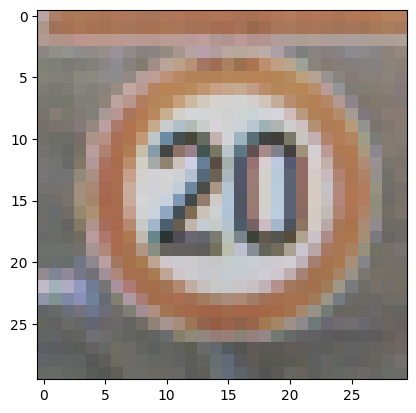

In [79]:
plt.imshow(data[0])

In [80]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31367, 30, 30, 3), (7842, 30, 30, 3), (31367,), (7842,))

In [84]:
y_train

array([36, 28,  2, ..., 39,  1, 10])

In [85]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#...try doing with label encoding

In [86]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#svm/random forest
#feature extraction
#reshaping of features

In [89]:
X_train.shape[1:]

(30, 30, 3)

In [90]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Metal device set to: Apple M2


2022-11-04 22:08:40.552206: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-04 22:08:40.553919: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 15s 15ms/step - loss: 0.6056 - accuracy: 0.8181 - val_loss: 0.2816 - val_accuracy: 0.9229
Epoch 2/15
981/981 [==============================] - 17s 17ms/step - loss: 0.4869 - accuracy: 0.8545 - val_loss: 0.2200 - val_accuracy: 0.9357
Epoch 3/15
981/981 [==============================] - 15s 15ms/step - loss: 0.4118 - accuracy: 0.8760 - val_loss: 0.2125 - val_accuracy: 0.9410
Epoch 4/15
981/981 [==============================] - 15s 15ms/step - loss: 0.3341 - accuracy: 0.9019 - val_loss: 0.1409 - val_accuracy: 0.9605
Epoch 5/15
981/981 [==============================] - 15s 15ms/step - loss: 0.2792 - accuracy: 0.9191 - val_loss: 0.0916 - val_accuracy: 0.9773
Epoch 6/15
981/981 [==============================] - 15s 15ms/step - loss: 0.2516 - accuracy: 0.9270 - val_loss: 0.0982 - val_accuracy: 0.9712
Epoch 7/15
981/981 [==============================] - 16s 16ms/step - loss: 0.2135 - accuracy: 0.9415 - val_loss: 0.0677 - val_accuracy:

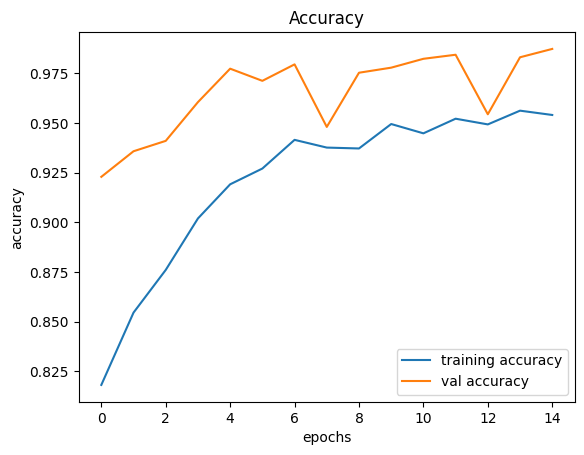

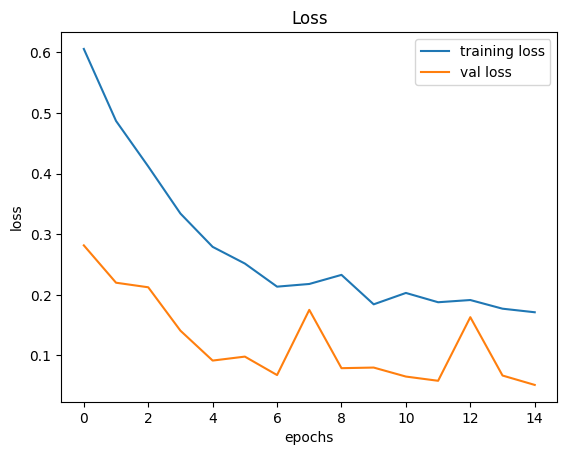

In [94]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [101]:
os.getcwd()

'/Users/harshithareddy/Documents/Harshitha/DSP/Project/Trafficsigns'

In [102]:
os.listdir(os.getcwd())

['.DS_Store',
 'archive',
 'Traffic_signal_project.ipynb',
 '.ipynb_checkpoints',
 'archive.zip']

In [107]:
path ='/Users/harshithareddy/Documents/Harshitha/DSP/Project/Trafficsigns/archive'

In [110]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('./archive/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(path +'/' + img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)
classes_x=np.argmax(pred,axis=1)
#Accuracy with the test data
print(accuracy_score(labels, classes_x))

395/395 [==============================] - 1s 2ms/step
0.9551068883610452


In [288]:
data = []
labels = []
classes = 43
os.getcwd()

'/Users/harshithareddy/Documents/Harshitha/DSP/Project/Trafficsigns'

In [289]:
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'archive','Train',str(i))
    images = os.listdir(path)
    
    for im in images:
        try:
            image = Image.open(path + '/' + im)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [290]:
data = np.array(data)
labels = np.array(labels)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [292]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [293]:
X_train.min(), X_train.max(), X_train.shape

(0.0, 1.0, (31367, 30, 30, 3))

In [294]:
# y_train = to_categorical(y_train, 43)
# y_test = to_categorical(y_test, 43)



In [295]:
from tensorflow import keras

In [253]:

lr=0.001


sgd = keras.optimizers.SGD(lr=lr, momentum=0.0, decay=0.0, nesterov=False)

xavier = keras.initializers.glorot_normal(seed=None)
 
activation = 'relu'


# model = Sequential()

# model.add(Dense(50, activation=activation, kernel_initializer=xavier))

# model.add(Dropout(0.2))

# model.add(Dense(25, activation=activation, kernel_initializer=xavier))

# model.add(Dropout(0.2))

# model.add(Dense(10, activation=activation, kernel_initializer=xavier))

# model.add(Dense(43, activation='softmax'))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,30,3)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(43, activation='softmax')
])



#Compile"
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

In [254]:
history2 = model.fit(X_train, y_train, epochs=500, batch_size=100,validation_data=(X_test, y_test) )

Epoch 1/500
  9/314 [..............................] - ETA: 1s - loss: 3.8460 - accuracy: 0.0300  

2022-11-05 15:48:44.991226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - ETA: 0s - loss: 3.6438 - accuracy: 0.0607

2022-11-05 15:48:46.820468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - 2s 6ms/step - loss: 3.6438 - accuracy: 0.0607 - val_loss: 3.5065 - val_accuracy: 0.1049
Epoch 2/500
314/314 [==============================] - 1s 5ms/step - loss: 3.5018 - accuracy: 0.0950 - val_loss: 3.4173 - val_accuracy: 0.1590
Epoch 3/500
314/314 [==============================] - 1s 5ms/step - loss: 3.4241 - accuracy: 0.1276 - val_loss: 3.3436 - val_accuracy: 0.2031
Epoch 4/500
314/314 [==============================] - 2s 5ms/step - loss: 3.3563 - accuracy: 0.1612 - val_loss: 3.2754 - val_accuracy: 0.2397
Epoch 5/500
314/314 [==============================] - 2s 5ms/step - loss: 3.2895 - accuracy: 0.1904 - val_loss: 3.2093 - val_accuracy: 0.2637
Epoch 6/500
314/314 [==============================] - 1s 5ms/step - loss: 3.2274 - accuracy: 0.2170 - val_loss: 3.1458 - val_accuracy: 0.2943
Epoch 7/500
314/314 [==============================] - 2s 5ms/step - loss: 3.1659 - accuracy: 0.2433 - val_loss: 3.0858 - val_accuracy: 0.3146
Epoch 8/500

314/314 [==============================] - 1s 5ms/step - loss: 1.7691 - accuracy: 0.5928 - val_loss: 1.7024 - val_accuracy: 0.6334
Epoch 59/500
314/314 [==============================] - 1s 5ms/step - loss: 1.7540 - accuracy: 0.5935 - val_loss: 1.6881 - val_accuracy: 0.6380
Epoch 60/500
314/314 [==============================] - 1s 5ms/step - loss: 1.7415 - accuracy: 0.5970 - val_loss: 1.6757 - val_accuracy: 0.6396
Epoch 61/500
314/314 [==============================] - 1s 5ms/step - loss: 1.7277 - accuracy: 0.6004 - val_loss: 1.6609 - val_accuracy: 0.6421
Epoch 62/500
314/314 [==============================] - 1s 5ms/step - loss: 1.7157 - accuracy: 0.6017 - val_loss: 1.6477 - val_accuracy: 0.6477
Epoch 63/500
314/314 [==============================] - 2s 5ms/step - loss: 1.7032 - accuracy: 0.6042 - val_loss: 1.6342 - val_accuracy: 0.6491
Epoch 64/500
314/314 [==============================] - 1s 5ms/step - loss: 1.6866 - accuracy: 0.6078 - val_loss: 1.6219 - val_accuracy: 0.6533
Epoch

Epoch 115/500
314/314 [==============================] - 2s 5ms/step - loss: 1.2241 - accuracy: 0.7133 - val_loss: 1.1719 - val_accuracy: 0.7569
Epoch 116/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2180 - accuracy: 0.7155 - val_loss: 1.1654 - val_accuracy: 0.7595
Epoch 117/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2108 - accuracy: 0.7177 - val_loss: 1.1592 - val_accuracy: 0.7599
Epoch 118/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2033 - accuracy: 0.7210 - val_loss: 1.1545 - val_accuracy: 0.7606
Epoch 119/500
314/314 [==============================] - 1s 5ms/step - loss: 1.1977 - accuracy: 0.7212 - val_loss: 1.1473 - val_accuracy: 0.7655
Epoch 120/500
314/314 [==============================] - 1s 5ms/step - loss: 1.1903 - accuracy: 0.7237 - val_loss: 1.1420 - val_accuracy: 0.7670
Epoch 121/500
314/314 [==============================] - 1s 5ms/step - loss: 1.1868 - accuracy: 0.7258 - val_loss: 1.1366 - val_ac

314/314 [==============================] - 2s 6ms/step - loss: 0.7886 - accuracy: 0.8241 - val_loss: 0.7571 - val_accuracy: 0.8583
Epoch 228/500
314/314 [==============================] - 2s 6ms/step - loss: 0.7832 - accuracy: 0.8274 - val_loss: 0.7548 - val_accuracy: 0.8586
Epoch 229/500
314/314 [==============================] - 2s 6ms/step - loss: 0.7806 - accuracy: 0.8252 - val_loss: 0.7518 - val_accuracy: 0.8591
Epoch 230/500
314/314 [==============================] - 2s 5ms/step - loss: 0.7796 - accuracy: 0.8254 - val_loss: 0.7500 - val_accuracy: 0.8596
Epoch 231/500
314/314 [==============================] - 2s 5ms/step - loss: 0.7770 - accuracy: 0.8271 - val_loss: 0.7478 - val_accuracy: 0.8599
Epoch 232/500
314/314 [==============================] - 2s 5ms/step - loss: 0.7744 - accuracy: 0.8266 - val_loss: 0.7454 - val_accuracy: 0.8606
Epoch 233/500
314/314 [==============================] - 2s 6ms/step - loss: 0.7722 - accuracy: 0.8276 - val_loss: 0.7435 - val_accuracy: 0.8619

314/314 [==============================] - 2s 5ms/step - loss: 0.5931 - accuracy: 0.8724 - val_loss: 0.5774 - val_accuracy: 0.8957
Epoch 340/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5941 - accuracy: 0.8712 - val_loss: 0.5762 - val_accuracy: 0.8959
Epoch 341/500
314/314 [==============================] - 2s 6ms/step - loss: 0.5892 - accuracy: 0.8729 - val_loss: 0.5752 - val_accuracy: 0.8965
Epoch 342/500
314/314 [==============================] - 2s 6ms/step - loss: 0.5892 - accuracy: 0.8733 - val_loss: 0.5738 - val_accuracy: 0.8965
Epoch 343/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5881 - accuracy: 0.8716 - val_loss: 0.5722 - val_accuracy: 0.8968
Epoch 344/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5866 - accuracy: 0.8729 - val_loss: 0.5717 - val_accuracy: 0.8973
Epoch 345/500
314/314 [==============================] - 1s 5ms/step - loss: 0.5880 - accuracy: 0.8735 - val_loss: 0.5704 - val_accuracy: 0.8966

314/314 [==============================] - 1s 5ms/step - loss: 0.4850 - accuracy: 0.8970 - val_loss: 0.4770 - val_accuracy: 0.9147
Epoch 452/500
314/314 [==============================] - 1s 5ms/step - loss: 0.4844 - accuracy: 0.8976 - val_loss: 0.4766 - val_accuracy: 0.9141
Epoch 453/500
314/314 [==============================] - 2s 5ms/step - loss: 0.4829 - accuracy: 0.8980 - val_loss: 0.4764 - val_accuracy: 0.9134
Epoch 454/500
314/314 [==============================] - 1s 5ms/step - loss: 0.4810 - accuracy: 0.8994 - val_loss: 0.4752 - val_accuracy: 0.9138
Epoch 455/500
314/314 [==============================] - 1s 5ms/step - loss: 0.4817 - accuracy: 0.8986 - val_loss: 0.4750 - val_accuracy: 0.9134
Epoch 456/500
314/314 [==============================] - 2s 5ms/step - loss: 0.4807 - accuracy: 0.8965 - val_loss: 0.4744 - val_accuracy: 0.9142
Epoch 457/500
314/314 [==============================] - 1s 5ms/step - loss: 0.4806 - accuracy: 0.8972 - val_loss: 0.4732 - val_accuracy: 0.9149

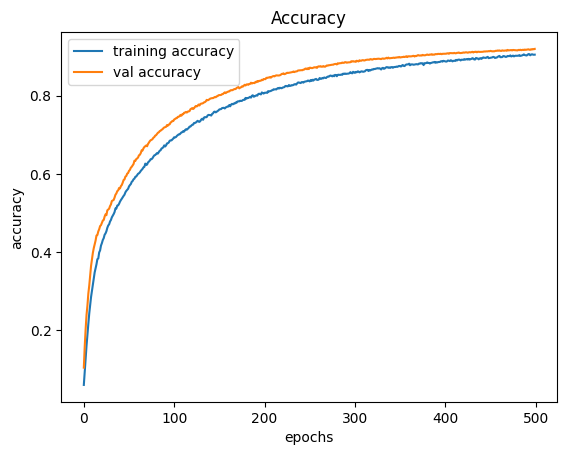

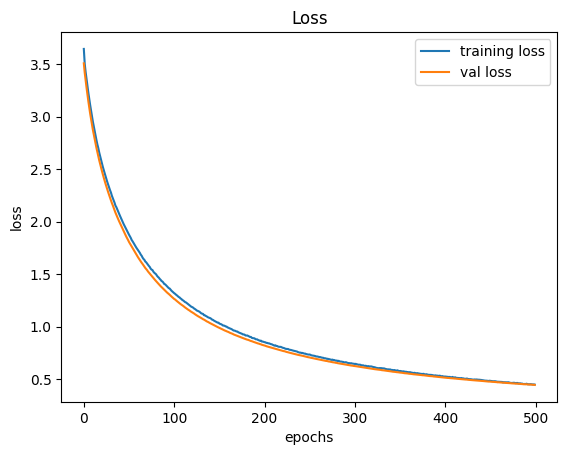

In [255]:
plt.figure(0)
plt.plot(history2.history['accuracy'], label='training accuracy')
plt.plot(history2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [256]:

lr=0.001

adam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

xavier = keras.initializers.glorot_normal(seed=None)
 
activation = 'relu'

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,30,3)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(43, activation='softmax')
])



#Compile"
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

history3 = model.fit(X_train, y_train, epochs=500, batch_size=100,validation_data=(X_test, y_test) )

Epoch 1/500


2022-11-05 16:01:30.865586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - ETA: 0s - loss: 3.6758 - accuracy: 0.0621

2022-11-05 16:01:33.580321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - 3s 9ms/step - loss: 3.6758 - accuracy: 0.0621 - val_loss: 3.5332 - val_accuracy: 0.0961
Epoch 2/500
314/314 [==============================] - 2s 5ms/step - loss: 3.5258 - accuracy: 0.0912 - val_loss: 3.4432 - val_accuracy: 0.1428
Epoch 3/500
314/314 [==============================] - 2s 5ms/step - loss: 3.4545 - accuracy: 0.1159 - val_loss: 3.3764 - val_accuracy: 0.1849
Epoch 4/500
314/314 [==============================] - 1s 5ms/step - loss: 3.3942 - accuracy: 0.1416 - val_loss: 3.3152 - val_accuracy: 0.2206
Epoch 5/500
314/314 [==============================] - 2s 5ms/step - loss: 3.3361 - accuracy: 0.1679 - val_loss: 3.2586 - val_accuracy: 0.2487
Epoch 6/500
314/314 [==============================] - 2s 5ms/step - loss: 3.2788 - accuracy: 0.1939 - val_loss: 3.2012 - val_accuracy: 0.2689
Epoch 7/500
314/314 [==============================] - 1s 5ms/step - loss: 3.2276 - accuracy: 0.2164 - val_loss: 3.1481 - val_accuracy: 0.2879
Epoch 8/500

314/314 [==============================] - 1s 5ms/step - loss: 1.8350 - accuracy: 0.5748 - val_loss: 1.7667 - val_accuracy: 0.6167
Epoch 59/500
314/314 [==============================] - 1s 5ms/step - loss: 1.8235 - accuracy: 0.5746 - val_loss: 1.7512 - val_accuracy: 0.6211
Epoch 60/500
314/314 [==============================] - 1s 5ms/step - loss: 1.8073 - accuracy: 0.5820 - val_loss: 1.7375 - val_accuracy: 0.6237
Epoch 61/500
314/314 [==============================] - 1s 5ms/step - loss: 1.7959 - accuracy: 0.5821 - val_loss: 1.7231 - val_accuracy: 0.6250
Epoch 62/500
314/314 [==============================] - 1s 5ms/step - loss: 1.7840 - accuracy: 0.5834 - val_loss: 1.7103 - val_accuracy: 0.6268
Epoch 63/500
314/314 [==============================] - 1s 5ms/step - loss: 1.7691 - accuracy: 0.5862 - val_loss: 1.6960 - val_accuracy: 0.6317
Epoch 64/500
314/314 [==============================] - 1s 5ms/step - loss: 1.7559 - accuracy: 0.5883 - val_loss: 1.6836 - val_accuracy: 0.6343
Epoch

Epoch 115/500
314/314 [==============================] - 2s 5ms/step - loss: 1.2703 - accuracy: 0.7067 - val_loss: 1.2117 - val_accuracy: 0.7460
Epoch 116/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2634 - accuracy: 0.7084 - val_loss: 1.2056 - val_accuracy: 0.7501
Epoch 117/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2574 - accuracy: 0.7093 - val_loss: 1.1983 - val_accuracy: 0.7547
Epoch 118/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2522 - accuracy: 0.7102 - val_loss: 1.1920 - val_accuracy: 0.7538
Epoch 119/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2450 - accuracy: 0.7135 - val_loss: 1.1855 - val_accuracy: 0.7531
Epoch 120/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2359 - accuracy: 0.7133 - val_loss: 1.1789 - val_accuracy: 0.7561
Epoch 121/500
314/314 [==============================] - 1s 5ms/step - loss: 1.2309 - accuracy: 0.7183 - val_loss: 1.1730 - val_ac

314/314 [==============================] - 2s 5ms/step - loss: 0.8085 - accuracy: 0.8241 - val_loss: 0.7707 - val_accuracy: 0.8569
Epoch 228/500
314/314 [==============================] - 2s 5ms/step - loss: 0.8041 - accuracy: 0.8219 - val_loss: 0.7687 - val_accuracy: 0.8582
Epoch 229/500
314/314 [==============================] - 1s 5ms/step - loss: 0.8069 - accuracy: 0.8198 - val_loss: 0.7674 - val_accuracy: 0.8563
Epoch 230/500
314/314 [==============================] - 2s 5ms/step - loss: 0.8022 - accuracy: 0.8211 - val_loss: 0.7646 - val_accuracy: 0.8583
Epoch 231/500
314/314 [==============================] - 2s 5ms/step - loss: 0.7990 - accuracy: 0.8246 - val_loss: 0.7615 - val_accuracy: 0.8597
Epoch 232/500
314/314 [==============================] - 2s 5ms/step - loss: 0.7967 - accuracy: 0.8221 - val_loss: 0.7599 - val_accuracy: 0.8582
Epoch 233/500
314/314 [==============================] - 2s 5ms/step - loss: 0.7942 - accuracy: 0.8251 - val_loss: 0.7567 - val_accuracy: 0.8614

314/314 [==============================] - 1s 5ms/step - loss: 0.6067 - accuracy: 0.8693 - val_loss: 0.5845 - val_accuracy: 0.8953
Epoch 340/500
314/314 [==============================] - 1s 5ms/step - loss: 0.6058 - accuracy: 0.8708 - val_loss: 0.5832 - val_accuracy: 0.8966
Epoch 341/500
314/314 [==============================] - 1s 5ms/step - loss: 0.6076 - accuracy: 0.8691 - val_loss: 0.5817 - val_accuracy: 0.8961
Epoch 342/500
314/314 [==============================] - 1s 5ms/step - loss: 0.6067 - accuracy: 0.8670 - val_loss: 0.5809 - val_accuracy: 0.8961
Epoch 343/500
314/314 [==============================] - 2s 5ms/step - loss: 0.6052 - accuracy: 0.8689 - val_loss: 0.5808 - val_accuracy: 0.8968
Epoch 344/500
314/314 [==============================] - 2s 5ms/step - loss: 0.6022 - accuracy: 0.8703 - val_loss: 0.5786 - val_accuracy: 0.8973
Epoch 345/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5993 - accuracy: 0.8729 - val_loss: 0.5769 - val_accuracy: 0.8967

314/314 [==============================] - 2s 5ms/step - loss: 0.4973 - accuracy: 0.8940 - val_loss: 0.4809 - val_accuracy: 0.9126
Epoch 452/500
314/314 [==============================] - 2s 5ms/step - loss: 0.4938 - accuracy: 0.8948 - val_loss: 0.4806 - val_accuracy: 0.9126
Epoch 453/500
314/314 [==============================] - 2s 5ms/step - loss: 0.4955 - accuracy: 0.8945 - val_loss: 0.4801 - val_accuracy: 0.9132
Epoch 454/500
314/314 [==============================] - 2s 5ms/step - loss: 0.4936 - accuracy: 0.8945 - val_loss: 0.4786 - val_accuracy: 0.9143
Epoch 455/500
314/314 [==============================] - 2s 5ms/step - loss: 0.4918 - accuracy: 0.8962 - val_loss: 0.4784 - val_accuracy: 0.9132
Epoch 456/500
314/314 [==============================] - 2s 5ms/step - loss: 0.4887 - accuracy: 0.8962 - val_loss: 0.4774 - val_accuracy: 0.9138
Epoch 457/500
314/314 [==============================] - 2s 5ms/step - loss: 0.4881 - accuracy: 0.8978 - val_loss: 0.4762 - val_accuracy: 0.9142

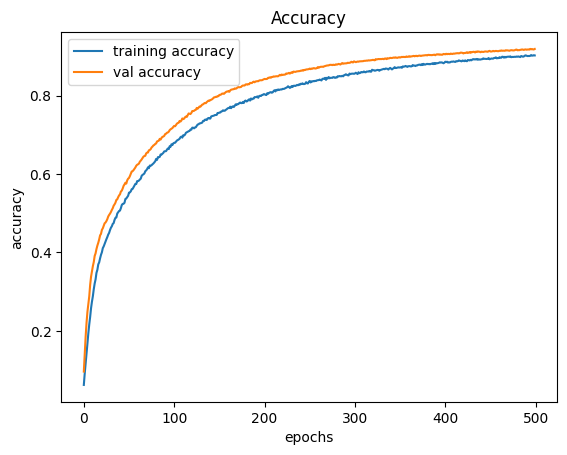

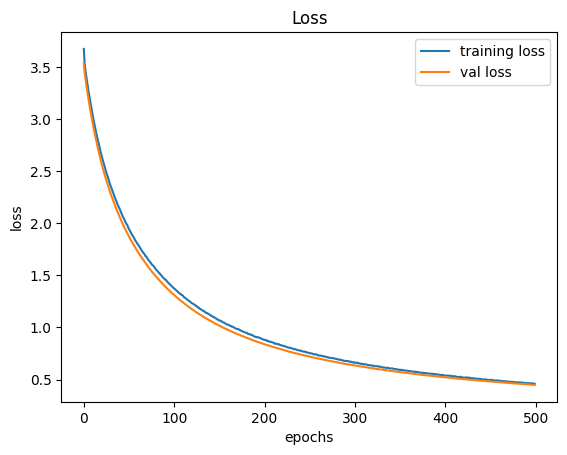

In [257]:
plt.figure(0)
plt.plot(history3.history['accuracy'], label='training accuracy')
plt.plot(history3.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history3.history['loss'], label='training loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [258]:

lr=0.001

adam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

xavier = keras.initializers.glorot_normal(seed=None)
 
activation = 'relu'

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,30,3)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(43, activation='softmax')
])



#Compile"
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

history3 = model.fit(X_train, y_train, epochs=500, batch_size=100,validation_data=(X_test, y_test) )

Epoch 1/500


2022-11-05 16:20:32.718810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - ETA: 0s - loss: 3.7049 - accuracy: 0.0419

2022-11-05 16:20:35.374199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - 3s 8ms/step - loss: 3.7049 - accuracy: 0.0419 - val_loss: 3.6008 - val_accuracy: 0.0666
Epoch 2/500
314/314 [==============================] - 2s 5ms/step - loss: 3.6091 - accuracy: 0.0627 - val_loss: 3.5330 - val_accuracy: 0.0743
Epoch 3/500
314/314 [==============================] - 2s 5ms/step - loss: 3.5535 - accuracy: 0.0793 - val_loss: 3.4780 - val_accuracy: 0.1024
Epoch 4/500
314/314 [==============================] - 2s 5ms/step - loss: 3.5129 - accuracy: 0.0943 - val_loss: 3.4338 - val_accuracy: 0.1378
Epoch 5/500
314/314 [==============================] - 2s 5ms/step - loss: 3.4746 - accuracy: 0.1103 - val_loss: 3.3946 - val_accuracy: 0.1631
Epoch 6/500
314/314 [==============================] - 2s 5ms/step - loss: 3.4371 - accuracy: 0.1278 - val_loss: 3.3552 - val_accuracy: 0.1857
Epoch 7/500
314/314 [==============================] - 2s 5ms/step - loss: 3.4011 - accuracy: 0.1432 - val_loss: 3.3135 - val_accuracy: 0.2155
Epoch 8/500

314/314 [==============================] - 2s 5ms/step - loss: 1.7147 - accuracy: 0.5522 - val_loss: 1.5666 - val_accuracy: 0.6187
Epoch 59/500
314/314 [==============================] - 2s 5ms/step - loss: 1.6950 - accuracy: 0.5572 - val_loss: 1.5487 - val_accuracy: 0.6302
Epoch 60/500
314/314 [==============================] - 2s 5ms/step - loss: 1.6726 - accuracy: 0.5611 - val_loss: 1.5303 - val_accuracy: 0.6268
Epoch 61/500
314/314 [==============================] - 2s 5ms/step - loss: 1.6565 - accuracy: 0.5660 - val_loss: 1.5127 - val_accuracy: 0.6356
Epoch 62/500
314/314 [==============================] - 2s 5ms/step - loss: 1.6400 - accuracy: 0.5675 - val_loss: 1.4936 - val_accuracy: 0.6417
Epoch 63/500
314/314 [==============================] - 2s 5ms/step - loss: 1.6199 - accuracy: 0.5737 - val_loss: 1.4786 - val_accuracy: 0.6413
Epoch 64/500
314/314 [==============================] - 2s 5ms/step - loss: 1.6011 - accuracy: 0.5775 - val_loss: 1.4600 - val_accuracy: 0.6509
Epoch

Epoch 115/500
314/314 [==============================] - 2s 5ms/step - loss: 1.0213 - accuracy: 0.7360 - val_loss: 0.9075 - val_accuracy: 0.7998
Epoch 116/500
314/314 [==============================] - 2s 5ms/step - loss: 1.0105 - accuracy: 0.7402 - val_loss: 0.8966 - val_accuracy: 0.8030
Epoch 117/500
314/314 [==============================] - 2s 5ms/step - loss: 1.0041 - accuracy: 0.7401 - val_loss: 0.8911 - val_accuracy: 0.8027
Epoch 118/500
314/314 [==============================] - 2s 5ms/step - loss: 0.9963 - accuracy: 0.7431 - val_loss: 0.8834 - val_accuracy: 0.8039
Epoch 119/500
314/314 [==============================] - 2s 5ms/step - loss: 0.9884 - accuracy: 0.7452 - val_loss: 0.8764 - val_accuracy: 0.8095
Epoch 120/500
314/314 [==============================] - 2s 5ms/step - loss: 0.9813 - accuracy: 0.7497 - val_loss: 0.8724 - val_accuracy: 0.8053
Epoch 121/500
314/314 [==============================] - 2s 5ms/step - loss: 0.9756 - accuracy: 0.7503 - val_loss: 0.8643 - val_ac

314/314 [==============================] - 2s 5ms/step - loss: 0.5542 - accuracy: 0.8655 - val_loss: 0.4910 - val_accuracy: 0.9013
Epoch 228/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5519 - accuracy: 0.8640 - val_loss: 0.4915 - val_accuracy: 0.8985
Epoch 229/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5471 - accuracy: 0.8676 - val_loss: 0.4873 - val_accuracy: 0.9019
Epoch 230/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5481 - accuracy: 0.8668 - val_loss: 0.4852 - val_accuracy: 0.9012
Epoch 231/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5443 - accuracy: 0.8679 - val_loss: 0.4864 - val_accuracy: 0.9012
Epoch 232/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5426 - accuracy: 0.8680 - val_loss: 0.4832 - val_accuracy: 0.9010
Epoch 233/500
314/314 [==============================] - 2s 5ms/step - loss: 0.5411 - accuracy: 0.8684 - val_loss: 0.4798 - val_accuracy: 0.9027

314/314 [==============================] - 2s 5ms/step - loss: 0.3905 - accuracy: 0.9081 - val_loss: 0.3557 - val_accuracy: 0.9272
Epoch 340/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3897 - accuracy: 0.9078 - val_loss: 0.3577 - val_accuracy: 0.9265
Epoch 341/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3885 - accuracy: 0.9087 - val_loss: 0.3542 - val_accuracy: 0.9280
Epoch 342/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3870 - accuracy: 0.9097 - val_loss: 0.3551 - val_accuracy: 0.9262
Epoch 343/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3873 - accuracy: 0.9087 - val_loss: 0.3541 - val_accuracy: 0.9286
Epoch 344/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3867 - accuracy: 0.9087 - val_loss: 0.3531 - val_accuracy: 0.9276
Epoch 345/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3847 - accuracy: 0.9089 - val_loss: 0.3530 - val_accuracy: 0.9277

314/314 [==============================] - 2s 6ms/step - loss: 0.3106 - accuracy: 0.9275 - val_loss: 0.2908 - val_accuracy: 0.9392
Epoch 452/500
314/314 [==============================] - 2s 6ms/step - loss: 0.3054 - accuracy: 0.9289 - val_loss: 0.2912 - val_accuracy: 0.9385
Epoch 453/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3086 - accuracy: 0.9276 - val_loss: 0.2895 - val_accuracy: 0.9392
Epoch 454/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3054 - accuracy: 0.9293 - val_loss: 0.2891 - val_accuracy: 0.9388
Epoch 455/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3055 - accuracy: 0.9294 - val_loss: 0.2899 - val_accuracy: 0.9390
Epoch 456/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3035 - accuracy: 0.9305 - val_loss: 0.2896 - val_accuracy: 0.9396
Epoch 457/500
314/314 [==============================] - 2s 5ms/step - loss: 0.3023 - accuracy: 0.9296 - val_loss: 0.2893 - val_accuracy: 0.9385

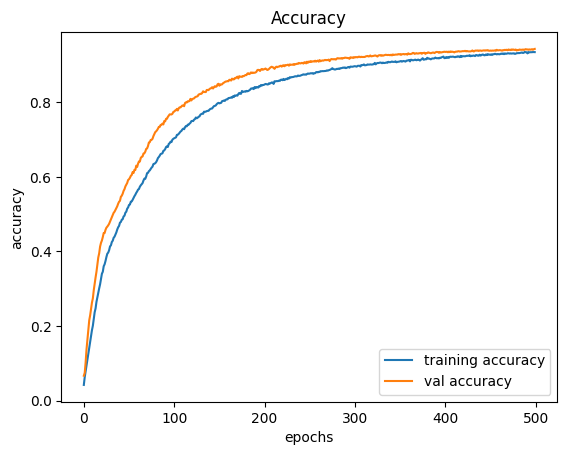

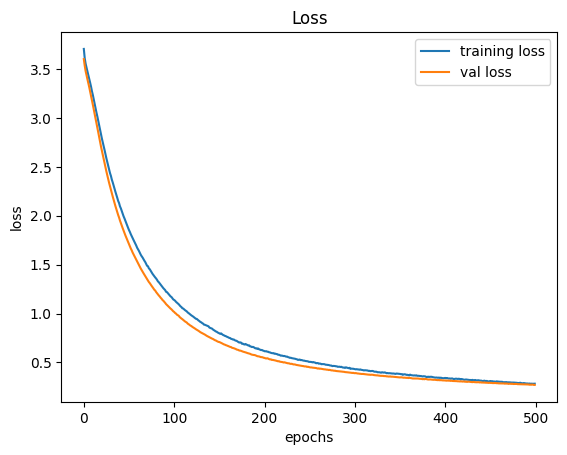

In [268]:
plt.figure(0)
plt.plot(history3.history['accuracy'], label='training accuracy')
plt.plot(history3.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history3.history['loss'], label='training loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [261]:
path="/Users/harshithareddy/Documents/Harshitha/DSP/Project/Trafficsigns/archive"
y_test_set = pd.read_csv('./archive/Test.csv')
labels = y_test_set["ClassId"].values
imgs = y_test_set["Path"].values
data=[]
for img in imgs:
    image = Image.open(path +'/' + img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test_set=np.array(data)
predictions = model.predict(X_test_set)
class_x=np.argmax(predictions,axis=1)
#Accuracy with the test data
print(accuracy_score(labels, class_x))


 17/395 [>.............................] - ETA: 1s  

2022-11-05 16:36:48.107052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - 1s 1ms/step
0.8563737133808392


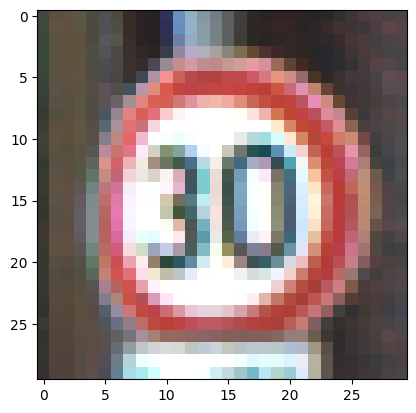

In [264]:
plt.imshow(data[1])

In [265]:
predictions[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [285]:

lr=0.001

adam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

xavier = keras.initializers.glorot_normal(seed=None)
 
activation = 'relu'

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,30,3)),
    tf.keras.layers.Dense(200, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(150, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(43, activation='softmax')
])



#Compile"
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

history4 = model.fit(X_train, y_train, epochs=500, batch_size=100,validation_data=(X_test, y_test))

Epoch 1/500


2022-11-05 18:08:22.700930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - ETA: 0s - loss: 3.7242 - accuracy: 0.0506

2022-11-05 18:08:24.959225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - 3s 8ms/step - loss: 3.7242 - accuracy: 0.0506 - val_loss: 3.6079 - val_accuracy: 0.0784
Epoch 2/500
314/314 [==============================] - 2s 6ms/step - loss: 3.6132 - accuracy: 0.0729 - val_loss: 3.5228 - val_accuracy: 0.0978
Epoch 3/500
314/314 [==============================] - 2s 6ms/step - loss: 3.5462 - accuracy: 0.0867 - val_loss: 3.4568 - val_accuracy: 0.1308
Epoch 4/500
314/314 [==============================] - 2s 6ms/step - loss: 3.4962 - accuracy: 0.1024 - val_loss: 3.4047 - val_accuracy: 0.1551
Epoch 5/500
314/314 [==============================] - 2s 6ms/step - loss: 3.4479 - accuracy: 0.1168 - val_loss: 3.3560 - val_accuracy: 0.1778
Epoch 6/500
314/314 [==============================] - 2s 6ms/step - loss: 3.4044 - accuracy: 0.1326 - val_loss: 3.3076 - val_accuracy: 0.1876
Epoch 7/500
314/314 [==============================] - 2s 7ms/step - loss: 3.3584 - accuracy: 0.1529 - val_loss: 3.2605 - val_accuracy: 0.2076
Epoch 8/500

314/314 [==============================] - 2s 6ms/step - loss: 1.7281 - accuracy: 0.5560 - val_loss: 1.5816 - val_accuracy: 0.6338
Epoch 59/500
314/314 [==============================] - 2s 6ms/step - loss: 1.7088 - accuracy: 0.5567 - val_loss: 1.5642 - val_accuracy: 0.6387
Epoch 60/500
314/314 [==============================] - 2s 6ms/step - loss: 1.6873 - accuracy: 0.5623 - val_loss: 1.5446 - val_accuracy: 0.6423
Epoch 61/500
314/314 [==============================] - 2s 6ms/step - loss: 1.6675 - accuracy: 0.5684 - val_loss: 1.5267 - val_accuracy: 0.6483
Epoch 62/500
314/314 [==============================] - 2s 6ms/step - loss: 1.6526 - accuracy: 0.5731 - val_loss: 1.5089 - val_accuracy: 0.6512
Epoch 63/500
314/314 [==============================] - 2s 6ms/step - loss: 1.6335 - accuracy: 0.5788 - val_loss: 1.4892 - val_accuracy: 0.6540
Epoch 64/500
314/314 [==============================] - 2s 6ms/step - loss: 1.6118 - accuracy: 0.5820 - val_loss: 1.4716 - val_accuracy: 0.6593
Epoch

Epoch 115/500
314/314 [==============================] - 2s 6ms/step - loss: 0.9987 - accuracy: 0.7471 - val_loss: 0.8940 - val_accuracy: 0.8085
Epoch 116/500
314/314 [==============================] - 2s 6ms/step - loss: 0.9871 - accuracy: 0.7509 - val_loss: 0.8864 - val_accuracy: 0.8086
Epoch 117/500
314/314 [==============================] - 2s 6ms/step - loss: 0.9873 - accuracy: 0.7458 - val_loss: 0.8800 - val_accuracy: 0.8118
Epoch 118/500
314/314 [==============================] - 2s 6ms/step - loss: 0.9738 - accuracy: 0.7521 - val_loss: 0.8738 - val_accuracy: 0.8119
Epoch 119/500
314/314 [==============================] - 2s 6ms/step - loss: 0.9695 - accuracy: 0.7544 - val_loss: 0.8664 - val_accuracy: 0.8134
Epoch 120/500
314/314 [==============================] - 2s 6ms/step - loss: 0.9619 - accuracy: 0.7536 - val_loss: 0.8611 - val_accuracy: 0.8138
Epoch 121/500
314/314 [==============================] - 2s 6ms/step - loss: 0.9543 - accuracy: 0.7580 - val_loss: 0.8537 - val_ac

314/314 [==============================] - 2s 6ms/step - loss: 0.5386 - accuracy: 0.8704 - val_loss: 0.4858 - val_accuracy: 0.9031
Epoch 228/500
314/314 [==============================] - 2s 6ms/step - loss: 0.5346 - accuracy: 0.8694 - val_loss: 0.4842 - val_accuracy: 0.9041
Epoch 229/500
314/314 [==============================] - 2s 6ms/step - loss: 0.5334 - accuracy: 0.8701 - val_loss: 0.4812 - val_accuracy: 0.9026
Epoch 230/500
314/314 [==============================] - 2s 6ms/step - loss: 0.5347 - accuracy: 0.8712 - val_loss: 0.4805 - val_accuracy: 0.9041
Epoch 231/500
314/314 [==============================] - 2s 6ms/step - loss: 0.5307 - accuracy: 0.8703 - val_loss: 0.4785 - val_accuracy: 0.9046
Epoch 232/500
314/314 [==============================] - 2s 6ms/step - loss: 0.5279 - accuracy: 0.8716 - val_loss: 0.4767 - val_accuracy: 0.9050
Epoch 233/500
314/314 [==============================] - 3s 8ms/step - loss: 0.5264 - accuracy: 0.8721 - val_loss: 0.4731 - val_accuracy: 0.9056

314/314 [==============================] - 2s 6ms/step - loss: 0.3752 - accuracy: 0.9119 - val_loss: 0.3494 - val_accuracy: 0.9297
Epoch 340/500
314/314 [==============================] - 2s 6ms/step - loss: 0.3784 - accuracy: 0.9115 - val_loss: 0.3484 - val_accuracy: 0.9295
Epoch 341/500
314/314 [==============================] - 2s 6ms/step - loss: 0.3753 - accuracy: 0.9123 - val_loss: 0.3478 - val_accuracy: 0.9290
Epoch 342/500
314/314 [==============================] - 2s 7ms/step - loss: 0.3739 - accuracy: 0.9125 - val_loss: 0.3473 - val_accuracy: 0.9306
Epoch 343/500
314/314 [==============================] - 2s 7ms/step - loss: 0.3704 - accuracy: 0.9143 - val_loss: 0.3456 - val_accuracy: 0.9315
Epoch 344/500
314/314 [==============================] - 2s 6ms/step - loss: 0.3706 - accuracy: 0.9133 - val_loss: 0.3450 - val_accuracy: 0.9302
Epoch 345/500
314/314 [==============================] - 2s 6ms/step - loss: 0.3725 - accuracy: 0.9122 - val_loss: 0.3436 - val_accuracy: 0.9325

314/314 [==============================] - 2s 7ms/step - loss: 0.2917 - accuracy: 0.9319 - val_loss: 0.2812 - val_accuracy: 0.9431
Epoch 452/500
314/314 [==============================] - 2s 6ms/step - loss: 0.2913 - accuracy: 0.9316 - val_loss: 0.2817 - val_accuracy: 0.9434
Epoch 453/500
314/314 [==============================] - 2s 6ms/step - loss: 0.2925 - accuracy: 0.9328 - val_loss: 0.2808 - val_accuracy: 0.9441
Epoch 454/500
314/314 [==============================] - 2s 7ms/step - loss: 0.2892 - accuracy: 0.9333 - val_loss: 0.2801 - val_accuracy: 0.9440
Epoch 455/500
314/314 [==============================] - 2s 6ms/step - loss: 0.2891 - accuracy: 0.9336 - val_loss: 0.2796 - val_accuracy: 0.9434
Epoch 456/500
314/314 [==============================] - 2s 6ms/step - loss: 0.2888 - accuracy: 0.9348 - val_loss: 0.2796 - val_accuracy: 0.9430
Epoch 457/500
314/314 [==============================] - 2s 6ms/step - loss: 0.2890 - accuracy: 0.9332 - val_loss: 0.2793 - val_accuracy: 0.9431

In [296]:

lr=0.001

adam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

xavier = keras.initializers.glorot_normal(seed=None)
 
activation = 'relu'

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,30,3)),
    tf.keras.layers.Dense(150, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(150, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(43, activation='softmax')
])



#Compile"
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

history5 = model.fit(X_train, y_train, epochs=500, batch_size=256,validation_data=(X_test, y_test))

Epoch 1/500


2022-11-05 18:47:02.459764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


123/123 [==============================] - ETA: 0s - loss: 3.7454 - accuracy: 0.0321

2022-11-05 18:47:04.433600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


123/123 [==============================] - 2s 13ms/step - loss: 3.7454 - accuracy: 0.0321 - val_loss: 3.7003 - val_accuracy: 0.0402
Epoch 2/500
123/123 [==============================] - 1s 8ms/step - loss: 3.7046 - accuracy: 0.0420 - val_loss: 3.6603 - val_accuracy: 0.0654
Epoch 3/500
123/123 [==============================] - 1s 9ms/step - loss: 3.6752 - accuracy: 0.0520 - val_loss: 3.6263 - val_accuracy: 0.0696
Epoch 4/500
123/123 [==============================] - 1s 8ms/step - loss: 3.6482 - accuracy: 0.0557 - val_loss: 3.5982 - val_accuracy: 0.0687
Epoch 5/500
123/123 [==============================] - 1s 8ms/step - loss: 3.6301 - accuracy: 0.0612 - val_loss: 3.5749 - val_accuracy: 0.0690
Epoch 6/500
123/123 [==============================] - 1s 9ms/step - loss: 3.6128 - accuracy: 0.0632 - val_loss: 3.5549 - val_accuracy: 0.0705
Epoch 7/500
123/123 [==============================] - 1s 9ms/step - loss: 3.5990 - accuracy: 0.0642 - val_loss: 3.5379 - val_accuracy: 0.0760
Epoch 8/50

123/123 [==============================] - 1s 8ms/step - loss: 2.9943 - accuracy: 0.2432 - val_loss: 2.8514 - val_accuracy: 0.3314
Epoch 59/500
123/123 [==============================] - 1s 8ms/step - loss: 2.9779 - accuracy: 0.2484 - val_loss: 2.8336 - val_accuracy: 0.3342
Epoch 60/500
123/123 [==============================] - 1s 9ms/step - loss: 2.9662 - accuracy: 0.2520 - val_loss: 2.8184 - val_accuracy: 0.3407
Epoch 61/500
123/123 [==============================] - 1s 8ms/step - loss: 2.9535 - accuracy: 0.2524 - val_loss: 2.8021 - val_accuracy: 0.3440
Epoch 62/500
123/123 [==============================] - 1s 9ms/step - loss: 2.9409 - accuracy: 0.2565 - val_loss: 2.7850 - val_accuracy: 0.3499
Epoch 63/500
123/123 [==============================] - 1s 8ms/step - loss: 2.9173 - accuracy: 0.2675 - val_loss: 2.7675 - val_accuracy: 0.3546
Epoch 64/500
123/123 [==============================] - 1s 8ms/step - loss: 2.9061 - accuracy: 0.2681 - val_loss: 2.7506 - val_accuracy: 0.3586
Epoch

Epoch 115/500
123/123 [==============================] - 1s 8ms/step - loss: 2.2215 - accuracy: 0.4099 - val_loss: 2.0170 - val_accuracy: 0.4832
Epoch 116/500
123/123 [==============================] - 1s 8ms/step - loss: 2.2153 - accuracy: 0.4107 - val_loss: 2.0051 - val_accuracy: 0.4830
Epoch 117/500
123/123 [==============================] - 1s 8ms/step - loss: 2.2038 - accuracy: 0.4105 - val_loss: 1.9942 - val_accuracy: 0.4860
Epoch 118/500
123/123 [==============================] - 1s 8ms/step - loss: 2.1914 - accuracy: 0.4157 - val_loss: 1.9826 - val_accuracy: 0.4888
Epoch 119/500
123/123 [==============================] - 1s 8ms/step - loss: 2.1832 - accuracy: 0.4158 - val_loss: 1.9715 - val_accuracy: 0.4907
Epoch 120/500
123/123 [==============================] - 1s 8ms/step - loss: 2.1716 - accuracy: 0.4178 - val_loss: 1.9604 - val_accuracy: 0.4930
Epoch 121/500
123/123 [==============================] - 1s 8ms/step - loss: 2.1597 - accuracy: 0.4207 - val_loss: 1.9482 - val_ac

123/123 [==============================] - 1s 9ms/step - loss: 1.3568 - accuracy: 0.6178 - val_loss: 1.1363 - val_accuracy: 0.7229
Epoch 228/500
123/123 [==============================] - 1s 9ms/step - loss: 1.3514 - accuracy: 0.6179 - val_loss: 1.1307 - val_accuracy: 0.7225
Epoch 229/500
123/123 [==============================] - 1s 8ms/step - loss: 1.3398 - accuracy: 0.6225 - val_loss: 1.1248 - val_accuracy: 0.7262
Epoch 230/500
123/123 [==============================] - 1s 9ms/step - loss: 1.3381 - accuracy: 0.6205 - val_loss: 1.1196 - val_accuracy: 0.7299
Epoch 231/500
123/123 [==============================] - 1s 9ms/step - loss: 1.3357 - accuracy: 0.6222 - val_loss: 1.1149 - val_accuracy: 0.7288
Epoch 232/500
123/123 [==============================] - 1s 9ms/step - loss: 1.3274 - accuracy: 0.6243 - val_loss: 1.1111 - val_accuracy: 0.7321
Epoch 233/500
123/123 [==============================] - 1s 10ms/step - loss: 1.3226 - accuracy: 0.6253 - val_loss: 1.1044 - val_accuracy: 0.734

123/123 [==============================] - 1s 8ms/step - loss: 0.9052 - accuracy: 0.7469 - val_loss: 0.7254 - val_accuracy: 0.8261
Epoch 340/500
123/123 [==============================] - 1s 8ms/step - loss: 0.9011 - accuracy: 0.7494 - val_loss: 0.7215 - val_accuracy: 0.8263
Epoch 341/500
123/123 [==============================] - 1s 8ms/step - loss: 0.8969 - accuracy: 0.7515 - val_loss: 0.7192 - val_accuracy: 0.8279
Epoch 342/500
123/123 [==============================] - 1s 8ms/step - loss: 0.8958 - accuracy: 0.7496 - val_loss: 0.7170 - val_accuracy: 0.8263
Epoch 343/500
123/123 [==============================] - 1s 8ms/step - loss: 0.8962 - accuracy: 0.7509 - val_loss: 0.7157 - val_accuracy: 0.8279
Epoch 344/500
123/123 [==============================] - 1s 8ms/step - loss: 0.8933 - accuracy: 0.7514 - val_loss: 0.7128 - val_accuracy: 0.8276
Epoch 345/500
123/123 [==============================] - 1s 8ms/step - loss: 0.8883 - accuracy: 0.7495 - val_loss: 0.7098 - val_accuracy: 0.8286

123/123 [==============================] - 1s 8ms/step - loss: 0.6714 - accuracy: 0.8146 - val_loss: 0.5278 - val_accuracy: 0.8735
Epoch 452/500
123/123 [==============================] - 1s 8ms/step - loss: 0.6658 - accuracy: 0.8132 - val_loss: 0.5277 - val_accuracy: 0.8725
Epoch 453/500
123/123 [==============================] - 1s 8ms/step - loss: 0.6679 - accuracy: 0.8111 - val_loss: 0.5264 - val_accuracy: 0.8716
Epoch 454/500
123/123 [==============================] - 1s 9ms/step - loss: 0.6635 - accuracy: 0.8160 - val_loss: 0.5257 - val_accuracy: 0.8720
Epoch 455/500
123/123 [==============================] - 1s 9ms/step - loss: 0.6660 - accuracy: 0.8146 - val_loss: 0.5235 - val_accuracy: 0.8750
Epoch 456/500
123/123 [==============================] - 1s 8ms/step - loss: 0.6572 - accuracy: 0.8180 - val_loss: 0.5213 - val_accuracy: 0.8750
Epoch 457/500
123/123 [==============================] - 1s 9ms/step - loss: 0.6623 - accuracy: 0.8163 - val_loss: 0.5224 - val_accuracy: 0.8743

In [302]:

lr=0.0001

adam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

xavier = keras.initializers.glorot_normal(seed=None)
 
activation = 'relu'

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,30,3)),
    tf.keras.layers.Dense(150, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(150, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(43, activation='softmax')
])



#Compile"
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping 

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

callback = [earlystop]

history5 = model.fit(X_train, y_train, epochs=400, batch_size=64,validation_data=(X_test, y_test),
                     callbacks=callback)

Epoch 1/400


2022-11-06 00:25:27.879081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


491/491 [==============================] - ETA: 0s - loss: 3.7123 - accuracy: 0.0486

2022-11-06 00:25:32.036836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


491/491 [==============================] - 5s 8ms/step - loss: 3.7123 - accuracy: 0.0486 - val_loss: 3.6115 - val_accuracy: 0.0669
Epoch 2/400
491/491 [==============================] - 3s 6ms/step - loss: 3.6070 - accuracy: 0.0662 - val_loss: 3.5180 - val_accuracy: 0.0726
Epoch 3/400
491/491 [==============================] - 3s 6ms/step - loss: 3.5456 - accuracy: 0.0759 - val_loss: 3.4588 - val_accuracy: 0.1061
Epoch 4/400
491/491 [==============================] - 3s 6ms/step - loss: 3.4992 - accuracy: 0.0889 - val_loss: 3.4112 - val_accuracy: 0.1373
Epoch 5/400
491/491 [==============================] - 3s 6ms/step - loss: 3.4520 - accuracy: 0.1009 - val_loss: 3.3615 - val_accuracy: 0.1818
Epoch 6/400
491/491 [==============================] - 3s 6ms/step - loss: 3.4034 - accuracy: 0.1147 - val_loss: 3.3064 - val_accuracy: 0.1980
Epoch 7/400
491/491 [==============================] - 3s 6ms/step - loss: 3.3500 - accuracy: 0.1330 - val_loss: 3.2462 - val_accuracy: 0.2151
Epoch 8/400

491/491 [==============================] - 3s 6ms/step - loss: 1.1335 - accuracy: 0.6954 - val_loss: 1.0082 - val_accuracy: 0.7373
Epoch 59/400
491/491 [==============================] - 3s 6ms/step - loss: 1.1144 - accuracy: 0.6989 - val_loss: 0.9847 - val_accuracy: 0.7522
Epoch 60/400
491/491 [==============================] - 3s 6ms/step - loss: 1.0984 - accuracy: 0.7050 - val_loss: 0.9796 - val_accuracy: 0.7448
Epoch 61/400
491/491 [==============================] - 3s 6ms/step - loss: 1.0742 - accuracy: 0.7111 - val_loss: 0.9527 - val_accuracy: 0.7562
Epoch 62/400
491/491 [==============================] - 3s 6ms/step - loss: 1.0545 - accuracy: 0.7176 - val_loss: 0.9377 - val_accuracy: 0.7598
Epoch 63/400
491/491 [==============================] - 3s 6ms/step - loss: 1.0380 - accuracy: 0.7220 - val_loss: 0.9281 - val_accuracy: 0.7651
Epoch 64/400
491/491 [==============================] - 3s 6ms/step - loss: 1.0202 - accuracy: 0.7244 - val_loss: 0.9105 - val_accuracy: 0.7739
Epoch

Epoch 115/400
491/491 [==============================] - 3s 6ms/step - loss: 0.5363 - accuracy: 0.8627 - val_loss: 0.4893 - val_accuracy: 0.8860
Epoch 116/400
491/491 [==============================] - 3s 6ms/step - loss: 0.5319 - accuracy: 0.8660 - val_loss: 0.4963 - val_accuracy: 0.8799
Epoch 117/400
491/491 [==============================] - 3s 6ms/step - loss: 0.5277 - accuracy: 0.8681 - val_loss: 0.4874 - val_accuracy: 0.8775
Epoch 118/400
491/491 [==============================] - 3s 6ms/step - loss: 0.5206 - accuracy: 0.8675 - val_loss: 0.4765 - val_accuracy: 0.8889
Epoch 119/400
491/491 [==============================] - 3s 6ms/step - loss: 0.5149 - accuracy: 0.8719 - val_loss: 0.5019 - val_accuracy: 0.8717
Epoch 120/400
491/491 [==============================] - 3s 6ms/step - loss: 0.5138 - accuracy: 0.8690 - val_loss: 0.4953 - val_accuracy: 0.8791
Epoch 121/400
491/491 [==============================] - 3s 6ms/step - loss: 0.5087 - accuracy: 0.8722 - val_loss: 0.4726 - val_ac

491/491 [==============================] - 3s 6ms/step - loss: 0.3577 - accuracy: 0.9140 - val_loss: 0.3501 - val_accuracy: 0.9184
Epoch 172/400
491/491 [==============================] - 3s 6ms/step - loss: 0.3573 - accuracy: 0.9140 - val_loss: 0.3429 - val_accuracy: 0.9202
Epoch 173/400
491/491 [==============================] - 3s 6ms/step - loss: 0.3557 - accuracy: 0.9126 - val_loss: 0.3462 - val_accuracy: 0.9212
Epoch 174/400
491/491 [==============================] - 3s 6ms/step - loss: 0.3540 - accuracy: 0.9134 - val_loss: 0.3395 - val_accuracy: 0.9240
Epoch 175/400
491/491 [==============================] - 3s 6ms/step - loss: 0.3525 - accuracy: 0.9140 - val_loss: 0.3358 - val_accuracy: 0.9264
Epoch 176/400
491/491 [==============================] - 3s 7ms/step - loss: 0.3466 - accuracy: 0.9156 - val_loss: 0.3381 - val_accuracy: 0.9267
Epoch 177/400
491/491 [==============================] - 3s 7ms/step - loss: 0.3435 - accuracy: 0.9177 - val_loss: 0.3348 - val_accuracy: 0.9249

In [ ]:
#32 -> 98% at 420 epoch without early stopping

In [ ]:
#learning rate
#batch size
#layers
#neurons
#early stopping -- this 
#normalization  -- this